In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('data/Training.xlsb', index_col='ID', engine='pyxlsb')
pd.set_option('display.max_columns', 30)
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,MARKER
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,33.750000,Mogilev region,132,NE employee,Secondary education (plus special education),Married,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,33.250000,Minsk region,6,NE employee,Secondary education (plus special education),Married,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,38.583333,Vitebsk region,71,NE employee,Secondary education (plus special education),Divorced/widow,1 One,property,No,No couple,No,Yes,No,Yes,No,0
4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,61.250000,Minsk region,48,Pensioner,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,48.583333,Brest region,48,NE employee,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,No,No,No,No,0


In [42]:
num_features = []
cat_features = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_features.append(col)
    else:
        num_features.append(col)
df.shape, num_features, cat_features

((89734, 25),
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'L', 'MARKER'],
 ['I', 'K', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'])

In [5]:
df.describe()

,A,B,C,D,E,F,G,H,J,L,MARKER
count,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000
mean,0.167863,0.113511,85.801266,548.507954,1.011455,0.683640,7.854358,0.510274,41.140778,103.719092,0.003811
std,0.153851,0.105340,105.366771,448.686233,0.910583,0.622047,4.754588,0.928146,11.129976,100.458022,0.061618
min,0.000002,0.000001,0.000000,49.980000,0.000016,0.000012,2.000000,0.000000,21.000000,0.000000,0.000000
25%,0.065843,0.042922,20.570000,227.030000,0.405983,0.263775,4.000000,0.000000,32.083333,29.000000,0.000000
50%,0.119133,0.079733,50.020000,408.735000,0.749403,0.499387,5.000000,0.000000,40.000000,69.000000,0.000000
75%,0.220000,0.146990,108.930000,746.710000,1.333367,0.899260,13.000000,0.010000,50.000000,144.000000,0.000000
max,7.067250,0.874025,2682.420000,4999.000000,35.337000,10.352991,24.000000,3.500000,64.916667,540.000000,1.000000


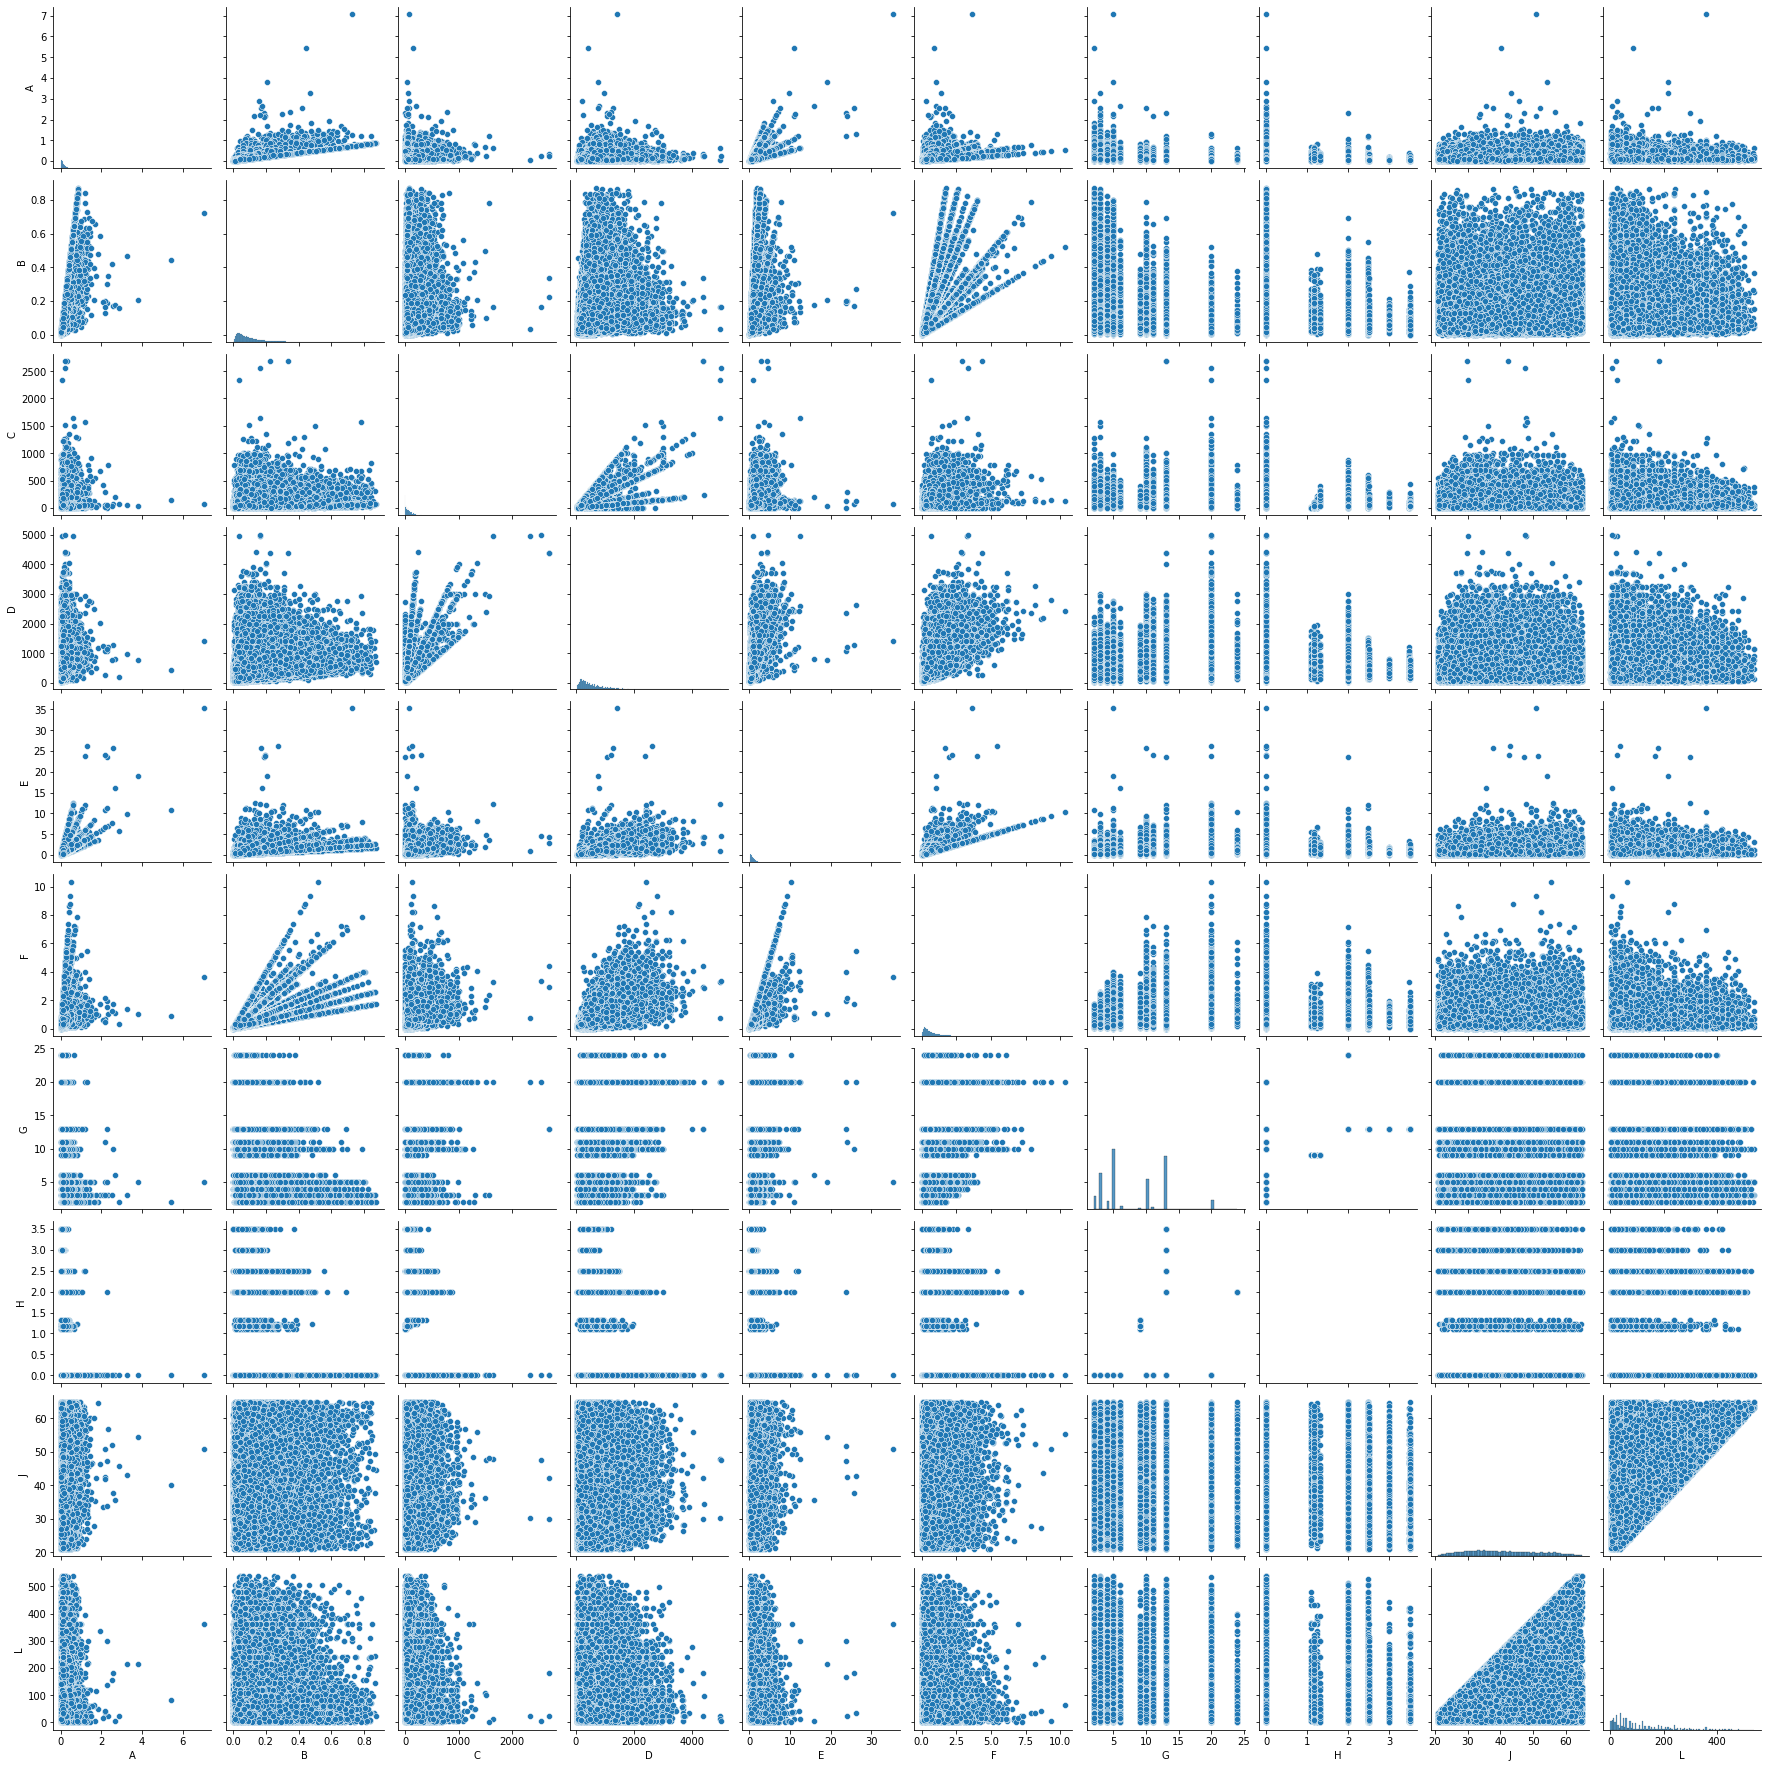

In [39]:
sns.pairplot(df[num_features[:-1]]);

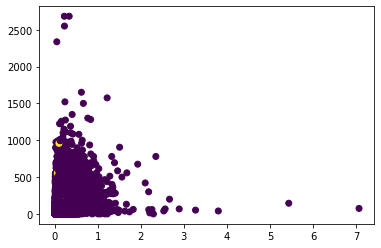

In [33]:
x = df.columns[0]
y = df.columns[2]
plt.scatter(df[x], df[y], c=df['MARKER']);

In [6]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(), '\n')

A 
 0.075980    79
0.115720    71
0.081217    68
0.096433    67
0.097460    66
            ..
0.410933     1
0.130467     1
0.164733     1
0.025231     1
0.153033     1
Name: A, Length: 46408, dtype: int64 

B 
 0.075980    41
0.057860    36
0.048730    35
0.094975    34
0.184050    34
            ..
0.181300     1
0.194581     1
0.080414     1
0.143790     1
0.122427     1
Name: B, Length: 56381, dtype: int64 

C 
 0.00      8293
40.01      619
30.47      505
121.77     493
21.47      389
          ... 
125.94       1
145.25       1
67.59        1
353.77       1
237.77       1
Name: C, Length: 11051, dtype: int64 

D 
 578.53     500
487.23     491
189.98     466
407.53     385
920.28     336
          ... 
1178.93      1
1031.20      1
257.15       1
618.99       1
951.23       1
Name: D, Length: 14941, dtype: int64 

E 
 0.379960    78
1.157060    72
0.964217    67
0.812050    67
0.474950    64
            ..
1.539400     1
0.375940     1
1.964859     1
2.456857     1
0.459158     1

In [7]:
df['I'].dtype == 'object'

True

In [8]:
pos = df[df['MARKER'] == 1]
u = 0
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, '\n', df[col].nunique(), df[col].nunique(), '\n')
        u += df[col].nunique() - 1
print(u)

I 
 2 2 

K 
 7 7 

M 
 5 5 

N 
 4 4 

O 
 4 4 

P 
 5 5 

Q 
 3 3 

R 
 2 2 

S 
 5 5 

T 
 2 2 

U 
 2 2 

V 
 3 3 

W 
 2 2 

X 
 2 2 

34
